In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
#import scikit-learn
import seaborn as sns

## Problem #1
Start a new script with any preclassified training data set you choose and use all of the following simple machine learning methods below to classify a new dataset. You may split a single data set into training and testing data.   Use a colored scatterplot and table to report correct and incorrect assignments.The methods you must demonstrateinclude K nearest neighbors = knn()function, naïve Bayes =naiveBayes()function from e1071 library, linear discriminant analysis= lda()function from the MASS library or quadratic discriminant analysis= qda() functionfrom MASS library.Optional exercise:employ an unsupervised clustering using expectation-maximization (EM clustering) using the model-based clustering package(mclust).

Perform 5-fold cross validation by random subsetting your data into 5 groupsThe general procedure is as follows:
1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    a.Take the group as a hold out or test data set
    b.Take the remaining groups as a training data set
    c.Run the methodon the training set and evaluate it on the test set
    d.Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scor

### Column Definitions:
1. anaemia = Decrease of red blood cells or hemoglobin (boolean)
2. creatinine_phosphokinase = Level of the CPK enzyme in the blood (mcg/L)
3. diabetes = If the patient has diabetes (boolean)
4. ejection_fraction = Percentage of blood leaving the heart at each contraction (percentage)
5. high_blood_pressure = If the patient has hypertension (boolean)
6. platelets = Platelets in the blood (kiloplatelets/mL)
7. serum_creatinine = Level of serum creatinine in the blood (mg/dL)
8. serum_sodium = Level of serum sodium in the blood (mEq/L)
9. sex = Woman or man (binary)
10. smoking = if person is a smoker or not 
11. time = Follow-up period (days)
12. DEATH_EVENT = If the patient deceased during the follow-up period (boolean)  #target or label 

Data taken from:
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

In [2]:
heart_failure = pd.read_csv("heart_failure_clinical_records_dataset.csv")
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
heart_failure["DEATH_EVENT"] = heart_failure["DEATH_EVENT"].astype('bool')

#### Shuffle Data
https://www.geeksforgeeks.org/pandas-how-to-shuffle-a-dataframe-rows/?ref=rp

In [4]:
heart_failure = heart_failure.sample(frac=1) #The frac keyword argument specifies the fraction of rows to return in the random sample, so frac=1 means return all rows (in random order).
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,False
41,50.0,0,124,1,30,1,153000.0,1.2,136,0,1,32,True
286,60.0,0,253,0,35,0,279000.0,1.7,140,1,0,250,False
210,70.0,0,212,1,17,1,389000.0,1.0,136,1,1,188,False
287,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250,False


In [5]:
heart_failure["DEATH_EVENT"].dtype

dtype('bool')

#### Split data into training and test set

In [6]:
from sklearn.model_selection import train_test_split

# split x (features) and y (label)
X = heart_failure.drop("DEATH_EVENT", axis=1) # this leaves out the death_event column to the target/label. axis=1 means column
y = heart_failure["DEATH_EVENT"]

# split for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2) # this leaves 20% for testing and 80% for training

#### K nearest neighbor
https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn

https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2

In [7]:
# https://towardsdatascience.com/k-nearest-neighbor-python-2fccc47d2a55

In [8]:
from sklearn.model_selection import train_test_split

# split x (features) and y (label)
X = heart_failure.drop("DEATH_EVENT", axis=1) # this leaves out the death_event column to the target/label. axis=1 means column
y = heart_failure["DEATH_EVENT"]

# split for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2) # this leaves 20% for testing and 80% for training

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)


print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.69
Accuracy of K-NN classifier on test set: 0.75


In [10]:
#Anohter way to Get accuracy score .
knn.score(X_test,y_test)

0.75

#### Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix

#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

confusion_matrix(y_test,y_pred)

array([[42,  4],
       [11,  3]])

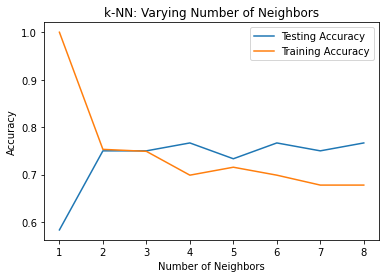

In [12]:
import matplotlib.pyplot as plt

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Correlation Plot 
Resource: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

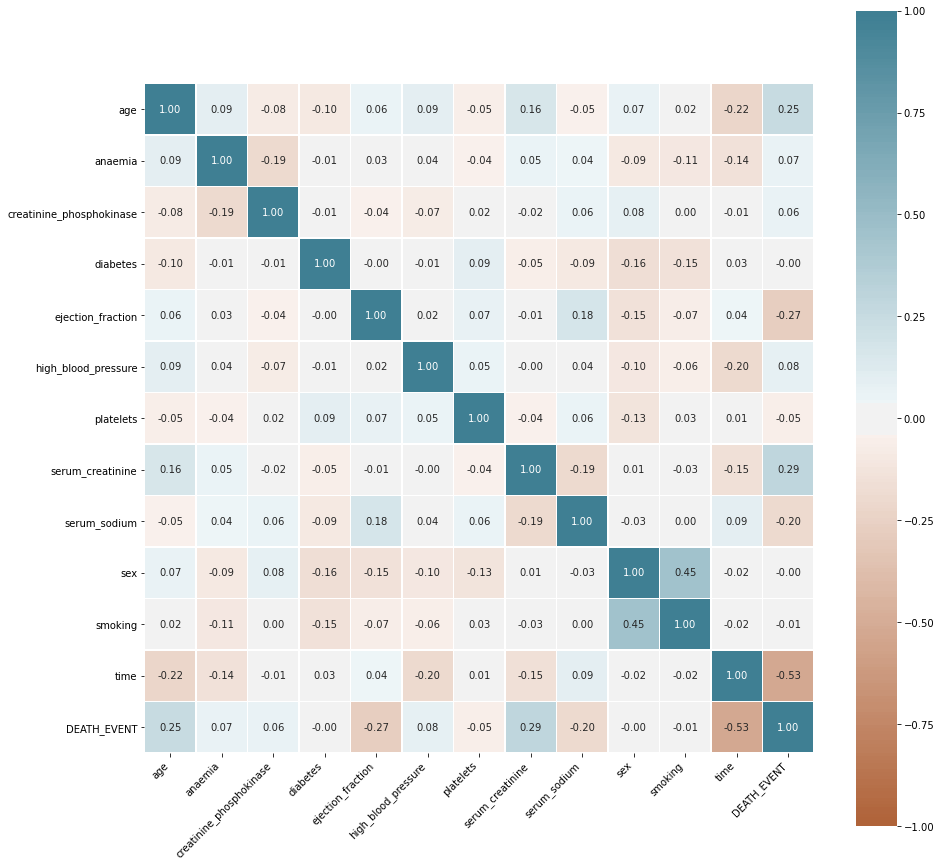

In [13]:
correlation = heart_failure.corr()

fig, ax = plt.subplots(figsize=(15, 15))

ax = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(30, 220, n=200),
    square=True, annot=True,linewidths=0.5,fmt=".2f")
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

#### KNN Scatterplot
https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

In [14]:
X = heart_failure.iloc[:, [1, 7]].values
y = heart_failure.iloc[:, -1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) 
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


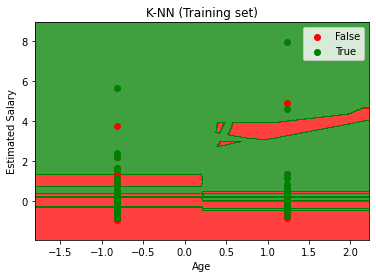

In [20]:
# Visualising the Training set results 
from matplotlib.colors import ListedColormap 
X_set, y_set = X_train, y_train 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), 
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)) 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
cmap = ListedColormap(('red', 'green'))) 
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j) 

plt.title('K-NN (Training set)') 
plt.xlabel('Age') 
plt.ylabel('Estimated Salary') 
plt.legend() 
plt.show()

#### Naive Bayes 

In [21]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.71
Accuracy of GNB classifier on test set: 0.68


In [22]:
from sklearn.metrics import confusion_matrix

#let us get the predictions using the classifier we had fit above
#y_pred = knn.predict(X_test)

#confusion_matrix(y_test,y_pred)

In [23]:
#https://datamites.com/blog/support-vector-machine-algorithm-svm-understanding-kernel-trick/

#### LDA 
Table?
https://www.techwithtim.net/tutorials/machine-learning-python/k-nearest-neighbors-3/

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)


print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.71
Accuracy of LDA classifier on test set: 0.65


In [25]:
from sklearn.metrics import confusion_matrix

#let us get the predictions using the classifier we had fit above
#y_pred = lda.predict(X_train)

#confusion_matrix(y_test,y_pred)

In [26]:
heart_failure["DEATH_EVENT"].dtype

dtype('bool')

In [27]:
pip install figures

Note: you may need to restart the kernel to use updated packages.


## Problem #2
Use e1071, kernalb and liquidSVM libraries conduct and compare support vector machine methods for classification. You can use any data except the IRIS example I posted previously. Try some different kernel functions (e.g. linear, polynomial and radial basis function) and compare classification accuracy. Did the classification turn out better than with simpler methods in question 1? Give percentages of correct classification (confusion matrix) and/or cross-validation to support your answer. Show a color-mapped scatterplot as well. Note – ksvm is automatically parameter tuned while svm is not. Try liquidSVM on a large scale prob

### Kernal Methods (SVM Kernal Trick)

"Kernel: A kernel is a method of placing a two dimensional plane into a higher dimensional space, so that it is curved in the higher dimensional space. (In simple terms, a kernel is a function from the low dimensional space into a higher dimensional space.)... A Kernel Trick is a simple method where a Non Linear data is projected onto a higher dimension space so as to make it easier to classify the data where it could be linearly divided by a plane."

Resource: https://datamites.com/blog/support-vector-machine-algorithm-svm-understanding-kernel-trick/

In [28]:
#shuffle data
heart_failure = heart_failure.sample(frac=1) #The frac keyword argument specifies the fraction of rows to return in the random sample, so frac=1 means return all rows (in random order).
heart_failure.head()

from sklearn.model_selection import train_test_split

# split x (features) and y (label)
X = heart_failure.drop("DEATH_EVENT", axis=1) # this leaves out the death_event column to the target/label. axis=1 means column
y = heart_failure["DEATH_EVENT"]

# split for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2) # this leaves 20% for testing and 80% for training

#### Linear Kernal SVM

In [29]:
#Import svm model
from sklearn import svm
from sklearn import metrics

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.85


In [30]:
confusion_matrix(y_test, y_pred)

array([[43,  3],
       [ 6,  8]])

#### Polynomial Kernal SVM

In [31]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly', degree=3) # third degree polynomial

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7666666666666667


In [32]:
confusion_matrix(y_test, y_pred)

array([[46,  0],
       [14,  0]])

#### Radial Bias Kernal SVM 

In [33]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') #radial bias function

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7666666666666667


In [34]:
confusion_matrix(y_test, y_pred)

array([[46,  0],
       [14,  0]])

### Liquid SVM

In [35]:
#!pip install --user --upgrade liquidSVM

In [36]:
#from liquidSVM import *

In [37]:
#pip install --user liquidSVM

#### Unfortunately, I was not able to get Liquid SVM package to load and run. 

## Problem #3 
Repeat your classification you did with the svm with some artificial neural network machine learning methods utilizing a simple neuralnet() function from the neuralnet R package. Does it perform better? Compare and contrast. Find a very large dataset and build a deep learning network using the keras and tensorflow packages in R. Deploy it on various hardware (your laptop, the sporc cluster and GPU if possible) and compare performance and speed. Specific to your data set, Produce a plot showing performance as a function of number of layers in the model and speed as a function of number of computing cores u

### Neural Networks 
Neural netowrk is a machine learning algorithm that is inspired by brain's neurons. It is represented as an interconnection between input and output by weight (which values are most important). During the learning process, the neurons adjust the weight through iterative process to make the best prediction. 

Resource: https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn

In [38]:
#shuffle data
heart_failure = heart_failure.sample(frac=1) #The frac keyword argument specifies the fraction of rows to return in the random sample, so frac=1 means return all rows (in random order).
heart_failure.head()

from sklearn.model_selection import train_test_split

# split x (features) and y (label)
X = heart_failure.drop("DEATH_EVENT", axis=1) # this leaves out the death_event column to the target/label. axis=1 means column
y = heart_failure["DEATH_EVENT"]

# split for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2) # this leaves 20% for testing and 80% for training

In [39]:
from sklearn.model_selection import train_test_split

# split x (features) and y (label)
X = heart_failure.drop("DEATH_EVENT", axis=1) # this leaves out the death_event column to the target/label. axis=1 means column
y = heart_failure["DEATH_EVENT"]

# split for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2) 

In [40]:
print(X_train.shape); print(X_test.shape) #this data contains 12 features (neurons)

(239, 12)
(60, 12)


In [41]:
from sklearn.neural_network import MLPClassifier

#'hidden_layer_sizes' argument set to five layers, which has the same number of neurons as the count of features (12) in the dataset.
mlp = MLPClassifier(hidden_layer_sizes=(12,12,12), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_test,predict_test))

[[162   0]
 [ 77   0]]
              precision    recall  f1-score   support

       False       0.68      1.00      0.81        41
        True       0.00      0.00      0.00        19

    accuracy                           0.68        60
   macro avg       0.34      0.50      0.41        60
weighted avg       0.47      0.68      0.55        60



/Users/sinounphoung/Desktop/BIOL_COURSE/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Compare and Contrast to SVM previously 
The linear kernal SVM have the best performace in comparison to the polynomial and rbf with 85 % test accuracy. Nevertheless, polynomial and rbf perform almost as well as linear kernal with accuracy of 76 %. When comparing SVM to neural networks, neural network only has an accuracy of 47% with three layers of neurons and 1000 train iterations. 

### Deep Learning 

Deep learning is an AI function that learn by example for pattern recogonition i.e. automatic vehicles recognize a stop sign, pesdistian, voice recogniztion such as Alexa and Siri, etc. 

Resource: https://www.youtube.com/watch?v=wQ8BIBpya2k
https://www.youtube.com/watch?v=j-3vuBynnOE

Code and Data Source taken from: https://keras.io/examples/structured_data/structured_data_classification_from_scratch/

In [43]:
#find new data set 

#!pip install tensorflow

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [45]:
import os 

In [46]:
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
dataframe = pd.read_csv(file_url)
dataframe.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [47]:
val_dataframe = dataframe.sample(frac=0.2, random_state=1337)
train_dataframe = dataframe.drop(val_dataframe.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataframe), len(val_dataframe)))

Using 242 samples for training and 61 for validation


In [48]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("target")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

In [49]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'age': <tf.Tensor: shape=(), dtype=int64, numpy=53>, 'sex': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'cp': <tf.Tensor: shape=(), dtype=int64, numpy=4>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=130>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=264>, 'fbs': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'restecg': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=143>, 'exang': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=0.4>, 'slope': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'ca': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'thal': <tf.Tensor: shape=(), dtype=string, numpy=b'normal'>}
Target: tf.Tensor(0, shape=(), dtype=int64)


In [50]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)

In [51]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers.experimental.preprocessing import CategoryEncoding
from tensorflow.keras.layers.experimental.preprocessing import StringLookup


def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_string_categorical_feature(feature, name, dataset):
    # Create a StringLookup layer which will turn strings into integer indices
    index = StringLookup()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    index.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = index(feature)

    # Create a CategoryEncoding for our integer indices
    encoder = CategoryEncoding(output_mode="binary")

    # Prepare a dataset of indices
    feature_ds = feature_ds.map(index)

    # Learn the space of possible indices
    encoder.adapt(feature_ds)

    # Apply one-hot encoding to our indices
    encoded_feature = encoder(encoded_feature)
    return encoded_feature


def encode_integer_categorical_feature(feature, name, dataset):
    # Create a CategoryEncoding for our integer indices
    encoder = CategoryEncoding(output_mode="binary")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the space of possible indices
    encoder.adapt(feature_ds)

    # Apply one-hot encoding to our indices
    encoded_feature = encoder(feature)
    return encoded_feature

In [52]:
# Categorical features encoded as integers
sex = keras.Input(shape=(1,), name="sex", dtype="int64")
cp = keras.Input(shape=(1,), name="cp", dtype="int64")
fbs = keras.Input(shape=(1,), name="fbs", dtype="int64")
restecg = keras.Input(shape=(1,), name="restecg", dtype="int64")
exang = keras.Input(shape=(1,), name="exang", dtype="int64")
ca = keras.Input(shape=(1,), name="ca", dtype="int64")

# Categorical feature encoded as string
thal = keras.Input(shape=(1,), name="thal", dtype="string")

# Numerical features
age = keras.Input(shape=(1,), name="age")
trestbps = keras.Input(shape=(1,), name="trestbps")
chol = keras.Input(shape=(1,), name="chol")
thalach = keras.Input(shape=(1,), name="thalach")
oldpeak = keras.Input(shape=(1,), name="oldpeak")
slope = keras.Input(shape=(1,), name="slope")

all_inputs = [
    sex,
    cp,
    fbs,
    restecg,
    exang,
    ca,
    thal,
    age,
    trestbps,
    chol,
    thalach,
    oldpeak,
    slope,
]

# Integer categorical features
sex_encoded = encode_integer_categorical_feature(sex, "sex", train_ds)
cp_encoded = encode_integer_categorical_feature(cp, "cp", train_ds)
fbs_encoded = encode_integer_categorical_feature(fbs, "fbs", train_ds)
restecg_encoded = encode_integer_categorical_feature(restecg, "restecg", train_ds)
exang_encoded = encode_integer_categorical_feature(exang, "exang", train_ds)
ca_encoded = encode_integer_categorical_feature(ca, "ca", train_ds)

# String categorical features
thal_encoded = encode_string_categorical_feature(thal, "thal", train_ds)

# Numerical features
age_encoded = encode_numerical_feature(age, "age", train_ds)
trestbps_encoded = encode_numerical_feature(trestbps, "trestbps", train_ds)
chol_encoded = encode_numerical_feature(chol, "chol", train_ds)
thalach_encoded = encode_numerical_feature(thalach, "thalach", train_ds)
oldpeak_encoded = encode_numerical_feature(oldpeak, "oldpeak", train_ds)
slope_encoded = encode_numerical_feature(slope, "slope", train_ds)

all_features = layers.concatenate(
    [
        sex_encoded,
        cp_encoded,
        fbs_encoded,
        restecg_encoded,
        exang_encoded,
        slope_encoded,
        ca_encoded,
        thal_encoded,
        age_encoded,
        trestbps_encoded,
        chol_encoded,
        thalach_encoded,
        oldpeak_encoded,
    ]
)
x = layers.Dense(32, activation="relu")(all_features)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(all_inputs, output)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

In [53]:
#pip install pydot

In [54]:
#!sudo port install graphviz

In [55]:
# `rankdir='LR'` is to make the graph horizontal.
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [56]:
model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
8/8 [==============================] - 0s 29ms/step - loss: 0.6325 - accuracy: 0.6488 - val_loss: 0.6045 - val_accuracy: 0.7541
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6127 - accuracy: 0.6942 - val_loss: 0.5680 - val_accuracy: 0.7705
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5895 - accuracy: 0.7025 - val_loss: 0.5364 - val_accuracy: 0.7869
Epoch 4/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5569 - accuracy: 0.7314 - val_loss: 0.5105 - val_accuracy: 0.7869
Epoch 5/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5615 - accuracy: 0.7190 - val_loss: 0.4877 - val_accuracy: 0.8033
Epoch 6/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5205 - accuracy: 0.7397 - val_loss: 0.4696 - val_accuracy: 0.7869
Epoch 7/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5010 - accuracy: 0.7521 - val_loss: 0.4541 - val_accuracy: 0.7541
Epoch 8/50
8/8 [=================

# Problem #4
Similar to previous scripts build a classifier based upon a random forest using randomForest()function from the randomForest library, and an boosted gradient (adaboost algorithm) using the ada() function from the ada library.   Compare and contrast 

### Random Forest

It works in four steps:
1. Select random samples from a given dataset.
2. Construct a decision tree for each sample and get a prediction result from each decision tree (multiple trees = forest)
3. Perform a vote for each predicted result (best model)
4. Select the prediction result with the most votes as the final prediction.

Resource: https://www.datacamp.com/community/tutorials/random-forests-classifier-python

In [57]:
#shuffle data
heart_failure = heart_failure.sample(frac=1) #The frac keyword argument specifies the fraction of rows to return in the random sample, so frac=1 means return all rows (in random order).
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
94,58.0,0,144,1,38,1,327000.0,0.7,142,0,0,83,False
279,55.0,0,84,1,38,0,451000.0,1.3,136,0,0,246,False
172,70.0,1,171,0,60,1,176000.0,1.1,145,1,1,146,False
275,45.0,0,582,0,38,1,422000.0,0.8,137,0,0,245,False
205,50.0,1,167,1,45,0,362000.0,1.0,136,0,0,187,False


In [58]:
from sklearn.model_selection import train_test_split

# split x (features) and y (label)
X = heart_failure.drop("DEATH_EVENT", axis=1) # this leaves out the death_event column to the target/label. axis=1 means column
y = heart_failure["DEATH_EVENT"]

# split for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2) # this leaves 20% for testing and 80% for training

In [59]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [60]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8833333333333333


In [61]:
confusion_matrix(y_test, y_pred)

array([[42,  3],
       [ 4, 11]])

### Adaptive Boosting
Boosting is an iterative method that combines low accuracy models to create a strong and more accurate model 

Resource: https://www.datacamp.com/community/tutorials/adaboost-classifier-python

In [62]:
#shuffle data
heart_failure = heart_failure.sample(frac=1) #The frac keyword argument specifies the fraction of rows to return in the random sample, so frac=1 means return all rows (in random order).
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
131,60.0,1,1082,1,45,0,250000.00,6.1,131,1,0,107,False
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,True
80,70.0,0,69,0,40,0,293000.00,1.7,136,0,0,75,False
166,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,False
293,63.0,1,103,1,35,0,179000.00,0.9,136,1,1,270,False


In [63]:
from sklearn.model_selection import train_test_split

# split x (features) and y (label)
X = heart_failure.drop("DEATH_EVENT", axis=1) # this leaves out the death_event column to the target/label. axis=1 means column
y = heart_failure["DEATH_EVENT"]

# split for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2) # this leaves 20% for testing and 80% for training

In [64]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

# Create adaboost classifer object
#AdaBoost uses Decision Tree Classifier as default Classifier
adab = AdaBoostClassifier(n_estimators=100,
                         learning_rate=1)  #n_estimators = number of weak learners to train iteratively
# Train Adaboost Classifer
model = adab.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [65]:
# Accuracy can be computed by comparing actual test set values and predicted values.
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


In [66]:
#training adaptive boosting with 50 iterations rather than 100
adab = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)  #n_estimators = number of weak learners to train iteratively

model = adab.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.85


In [67]:
confusion_matrix(y_test, y_pred)

array([[36,  4],
       [ 5, 15]])

### Compare and Contrast 
Both models uses ensemble tecnique of classification for optimal model (technically speaking for random forest). In random forest, dataset is split into multiple decision trees and the best predicting model is chosen as the representative model. Whereas, in adaptive boosting the model retrain learn and retrain itself through iterative process to find the best solution with optimal accurate model. Random forest and adaptive boosting in my dataset resulted in the same accuracy score. However when I train the adaptive bosting with 50 estimators (iterations),it showed more accuracy then the random forest model by one percent.